### UNZIPPING THE ABSTRACTING THE FILE

In [33]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/cat_dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### IMPORTING LIBRARIES

In [34]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
import cv2
#importing our pretrained vgg16 model
from keras.applications.vgg16 import VGG16

### MODEL: VGG16

In [35]:
#making an object of VGG16 class
#assigning the same weights
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [36]:
#getting the summary of our model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### MAKING OUR OWN FULLY CONNECTED LAYER

In [37]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#getting the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               2097408   
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
#we will not train convolutional layer
conv_base.trainable = False
#getting the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               2097408   
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### DATA AUGMENTATION(TO AVOID OVERFITTING)

In [41]:
#importing library
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/training_set',target_size=(150, 150),batch_size=batch_size,class_mode='binary')

validation_generator = test_datagen.flow_from_directory('/content/test_set',target_size=(150, 150),batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [42]:
#compiling our model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#training begins
history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

<ipython-input-43-ab181f86c981>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
251/251 [==============================] - 78s 294ms/step - loss: 0.0057 - accuracy: 0.9960 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 2/10
251/251 [==============================] - 71s 283ms/step - loss: 2.0299e-25 - accuracy: 1.0000 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 3/10
251/251 [==============================] - 71s 282ms/step - loss: 9.8803e-25 - accuracy: 1.0000 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 4/10
251/251 [==============================] - 71s 282ms/step - loss: 3.1618e-25 - accuracy: 1.0000 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 5/10
251/251 [==============================] - 72s 285ms/step - loss: 2.1382e-25 - accuracy: 1.0000 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 6/10
251/251 [==============================] - 70s 279ms/step - loss: 1.4819e-25 - accuracy: 1.0000 - val_loss: 2.7102e-22 - val_accuracy: 1.0000
Epoch 7/10
251/251 [==============================] - 70s 278ms/step - loss: 1.1014e-2

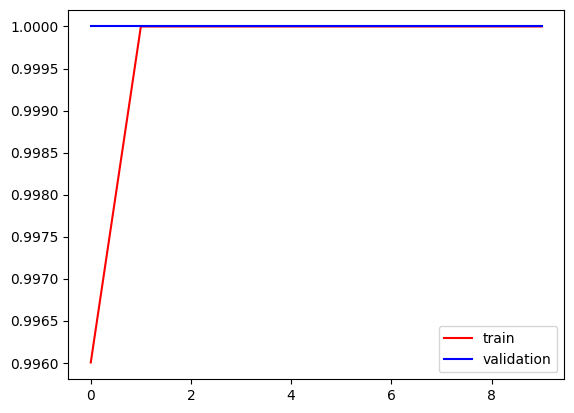

In [44]:
#checking the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

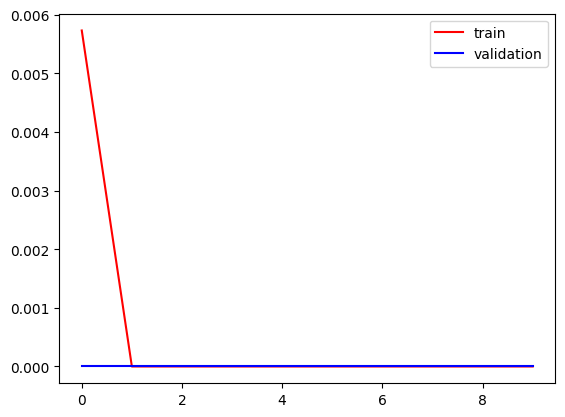

In [45]:
#checking the loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### TESTING ON NEWER IMAGES

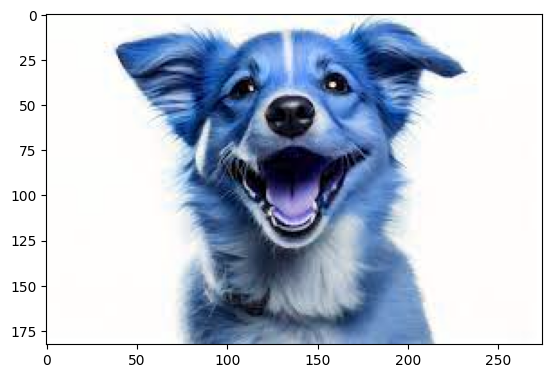

In [46]:
#LOADING OUR IMAGE
test_img = cv2.imread('/content/drive/MyDrive/doggy.jpeg')
plt.imshow(test_img)

In [47]:
#CHECKING ITS SHAPE
test_img.shape

(183, 275, 3)

In [55]:
#DATA PREPROCESSING
#RESIZING THE SHAPE OF THE IMAGE
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
model.predict(test_input)

1/1 [==============================] - 0s 42ms/step


array([[0.]], dtype=float32)

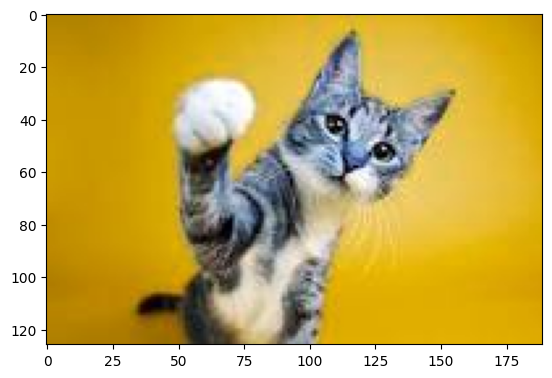

In [61]:
test_img = cv2.imread('/content/drive/MyDrive/catty.jpeg')
plt.imshow(test_img)
plt.show()

In [62]:
#getting the shape of image
test_img.shape

(126, 189, 3)

In [63]:
#resizing the image
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
#predicting the result
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

### OBSERVATION: WE CAN SEE THAT OUR MODEL HAS PERFORMED REALLY WELL WITH A TRAINING ACCURACY OF 93% AND VALIDATION ACCURACY OF 92%.